In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("multiclass_calls_dataset_with_rand.csv")

X = df['text_snippet'].values  
y = df['labels'].values  

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X).toarray()  


mlb = MultiLabelBinarizer()
y = mlb.fit_transform([labels.split(", ") for labels in y]) 


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()

model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))  
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(y_train.shape[1], activation='sigmoid'))  

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


y_pred = model.predict(X_val)
y_pred_labels = mlb.inverse_transform(y_pred > 0.5)


print(f"Predicted labels for first validation instance: {y_pred_labels[0]}")


2025-01-26 20:21:25.669442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 20:21:25.673368: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 20:21:25.684967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737903085.704751  206213 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737903085.711696  206213 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 20:21:25.737200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/100


/home/sreekar-vyas-kurudi/code/fast_api_app/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1737903088.718671  206213 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2930 - loss: 0.6833 - val_accuracy: 0.5750 - val_loss: 0.6601
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4011 - loss: 0.6534 - val_accuracy: 0.5208 - val_loss: 0.6298
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5150 - loss: 0.6211 - val_accuracy: 0.5292 - val_loss: 0.5986
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4865 - loss: 0.5937 - val_accuracy: 0.5167 - val_loss: 0.5666
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5044 - loss: 0.5634 - val_accuracy: 0.4542 - val_loss: 0.5321
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4693 - loss: 0.5358 - val_accuracy: 0.4167 - val_loss: 0.4949
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4705 - loss: 0.5014 - val_accuracy: 0.4042 - val_loss: 0.4591
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4531 - loss: 0.4590 - val_accuracy: 0.3875 - val_loss: 0.

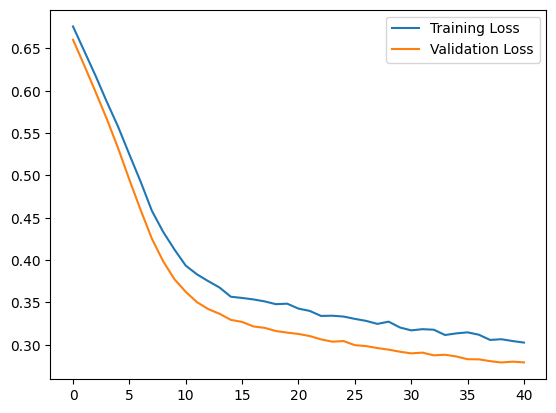

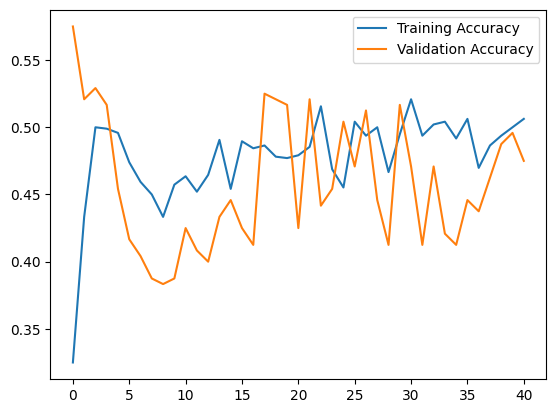

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [3]:
custom_input = None

In [ ]:
custom_input = "We like the model pricing discount, but our compliance team is asking for SOC2 certification."
custom_input_vectorized = vectorizer.transform([custom_input]).toarray() 
y_pred_custom = model.predict(custom_input_vectorized)
predicted_labels = mlb.inverse_transform(y_pred_custom > 0.5)  
with open('output.txt', 'w') as file:
    file.write(f'{predicted_labels[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Precision: 0.6940
Recall: 0.7947
F1 Score: 0.7409

Classification Report:
                    precision    recall  f1-score   support

       Competition       0.89      0.99      0.94       109
         Objection       0.85      0.99      0.92       113
Pricing Discussion       0.87      0.99      0.93       116
          Security       0.86      1.00      0.92       103
              rand       0.00      0.00      0.00        32

         micro avg       0.87      0.93      0.90       473
         macro avg       0.69      0.79      0.74       473
      weighted avg       0.81      0.93      0.86       473
       samples avg       0.87      0.86      0.86       473



/home/sreekar-vyas-kurudi/code/fast_api_app/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sreekar-vyas-kurudi/code/fast_api_app/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


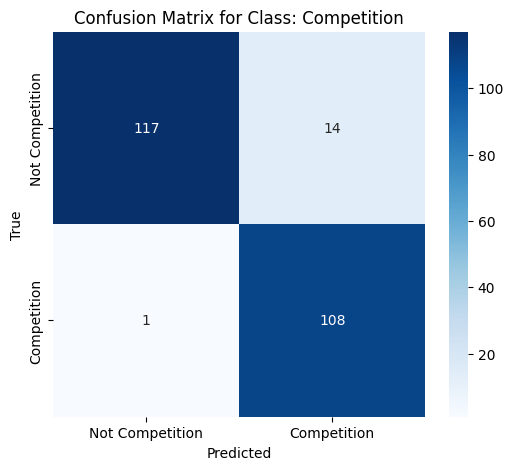

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_binary = (y_pred > 0.5).astype(int)


precision = precision_score(y_val, y_pred_binary, average='macro')
recall = recall_score(y_val, y_pred_binary, average='macro')
f1 = f1_score(y_val, y_pred_binary, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_val, y_pred_binary, target_names=mlb.classes_))


conf_matrix = multilabel_confusion_matrix(y_val, y_pred_binary)


class_index = 0 
class_name = mlb.classes_[class_index]


conf_matrix_class = conf_matrix[class_index]


plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_class,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not " + class_name, class_name],
    yticklabels=["Not " + class_name, class_name]
)
plt.title(f"Confusion Matrix for Class: {class_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
